## Question 1.

## Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Dataset

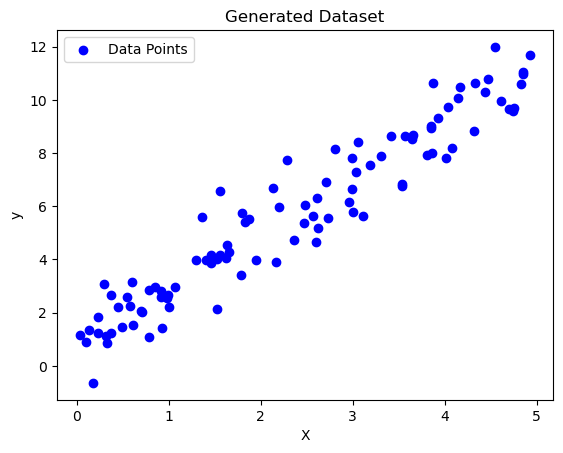

In [2]:
# Generating a dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 2 * X + 1 + np.random.randn(100, 1)

# Plotting the generated dataset
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.show()

## Linear regression using |x-xhat|^3

In [3]:
# Linear regression using |x-xhat|^3 as the loss function
def cubic_loss_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Initializing parameters
    m = len(y)
    theta = np.random.randn(2, 1)
    X_b = np.c_[np.ones((m, 1)), X]  # Adding bias term

    for epoch in range(epochs):
        gradients = -2 / m * X_b.T.dot(np.sign(X_b.dot(theta) - y) * np.abs(X_b.dot(theta) - y)**2)
        theta -= learning_rate * gradients

    return theta


## Polynomial regression using |x-xhat|^7

In [4]:
# Polynomial regression using |x-xhat|^7 as the loss function
def polynomial_loss_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Initializing parameters
    m = len(y)
    theta = np.random.randn(2, 1)
    X_b = np.c_[np.ones((m, 1)), X]  # Adding bias term

    for epoch in range(epochs):
        gradients = -2 / m * X_b.T.dot(np.sign(X_b.dot(theta) - y) * np.abs(X_b.dot(theta) - y)**6)
        theta -= learning_rate * gradients

    return theta


## Training linear regression

In [5]:
from sklearn.linear_model import LinearRegression

# Training linear regression using sklearn
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

## generates a plot showing the dataset along with the curves

C:\Users\Anunay Minj\AppData\Local\Temp\ipykernel_19436\225334462.py:9: RuntimeWarning: overflow encountered in square
  gradients = -2 / m * X_b.T.dot(np.sign(X_b.dot(theta) - y) * np.abs(X_b.dot(theta) - y)**2)
C:\Users\Anunay Minj\AppData\Local\Temp\ipykernel_19436\1239927507.py:9: RuntimeWarning: overflow encountered in power
  gradients = -2 / m * X_b.T.dot(np.sign(X_b.dot(theta) - y) * np.abs(X_b.dot(theta) - y)**6)


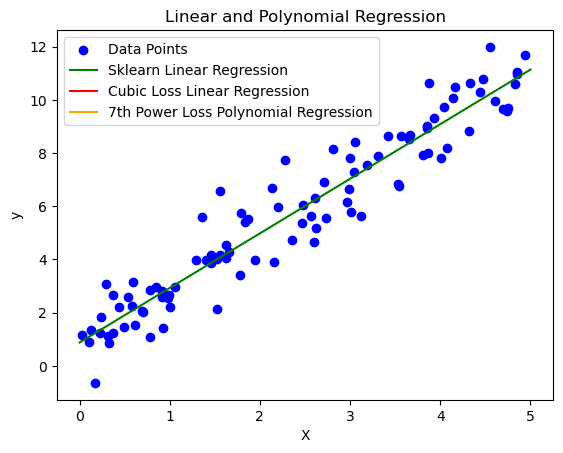

In [6]:
# Generating points for plotting the curves
X_new = np.linspace(0, 5, 100).reshape(-1, 1)

# Predictions from the models
y_lin_reg = lin_reg.predict(X_new)
theta_cubic = cubic_loss_gradient_descent(X, y)
y_cubic = np.c_[np.ones((100, 1)), X_new].dot(theta_cubic)
theta_poly = polynomial_loss_gradient_descent(X, y)
y_poly = np.c_[np.ones((100, 1)), X_new].dot(theta_poly)

# Plotting the curves
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_lin_reg, color='green', label='Sklearn Linear Regression')
plt.plot(X_new, y_cubic, color='red', label='Cubic Loss Linear Regression')
plt.plot(X_new, y_poly, color='orange', label='7th Power Loss Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear and Polynomial Regression')
plt.legend()
plt.show()


## Question 2

## Importing libaries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Loading the dataset

In [38]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
# Assuming you've downloaded and extracted the dataset
data = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',', na_values=-200)

In [39]:
# Drop columns related to date and time
data = data.drop(columns=['Date', 'Time', 'Unnamed: 15' ,'Unnamed: 16'])

In [40]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Data Preprocessing

In [41]:
# Handling Missing Values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [42]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [43]:
# Correlation Matrix Insights
corr_matrix = data.corr()
print(corr_matrix['RH'])  # Checking correlations with RH


CO(GT)           0.039006
PT08.S1(CO)      0.120571
NMHC(GT)        -0.057743
C6H6(GT)        -0.059042
PT08.S2(NMHC)   -0.089354
NOx(GT)          0.177035
PT08.S3(NOx)    -0.042076
NO2(GT)         -0.125027
PT08.S4(NO2)     0.007712
PT08.S5(O3)      0.146812
T               -0.580019
RH               1.000000
AH               0.204815
Name: RH, dtype: float64


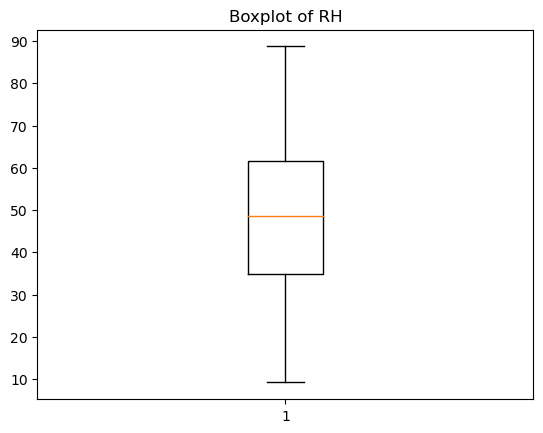

In [44]:
# Outlier Detection
plt.boxplot(data['RH'])
plt.title('Boxplot of RH')
plt.show()


In [45]:
# Splitting into training and test datasets
X = data.drop(columns=['RH'])  # Features
y = data['RH']  # Target variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [47]:
# Manual Linear Regression using Numpy and Pandas
X_train_np = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
theta = np.linalg.inv(X_train_np.T.dot(X_train_np)).dot(X_train_np.T).dot(y_train)


In [48]:
# Predicting on test set
X_test_np = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred_manual = X_test_np.dot(theta)

In [49]:
# Sklearn Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

## Evaluation

In [50]:
# Calculating r2 score and mean squared error
r2_manual = r2_score(y_test, y_pred_manual)
mse_manual = mean_squared_error(y_test, y_pred_manual)

r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


In [51]:
# Comparing Results
print(f"Manual Implementation - R2 Score: {r2_manual}, MSE: {mse_manual}")
print(f"Sklearn Linear Regression - R2 Score: {r2_sklearn}, MSE: {mse_sklearn}")


Manual Implementation - R2 Score: 0.8871796764522842, MSE: 35.55303397722173
Sklearn Linear Regression - R2 Score: 0.887179676452278, MSE: 35.55303397722369


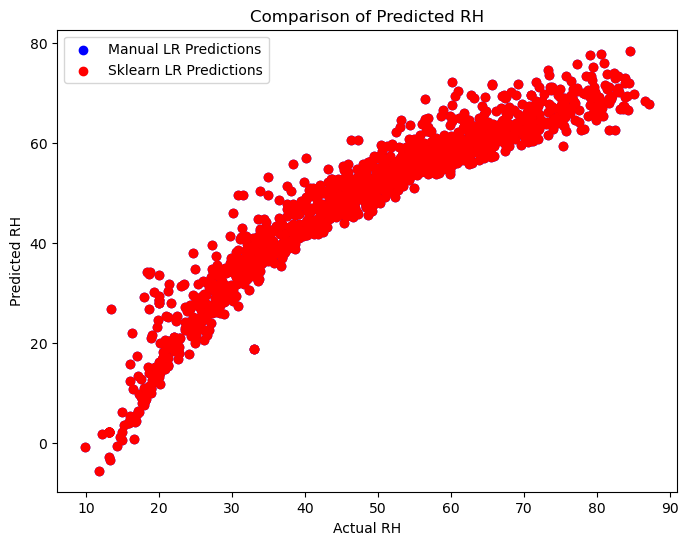

In [53]:
# Plotting results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_manual, color='blue', label='Manual LR Predictions')
plt.scatter(y_test, y_pred_sklearn, color='red', label='Sklearn LR Predictions')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.title('Comparison of Predicted RH')
plt.legend()
plt.show()